<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITxT%2014.310xDASS/Notebooks/social_w3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Analysis for Social Science

**OBJECTIVES**

- Load and explore data with R and the `tidyverse` package
- Develop an intuition for probability distributions and their relationship to integrals
- Build basic regression models using R

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
df <- read_csv('health.csv')

New names:
• `` -> `...1`
Rows: 1207 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (5): ...1, age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(df)

...1,age,sex,bmi,children,smoker,region,charges
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,18,male,33.770,1,no,southeast,1725.552
2,28,NA,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
5,31,female,NA,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506


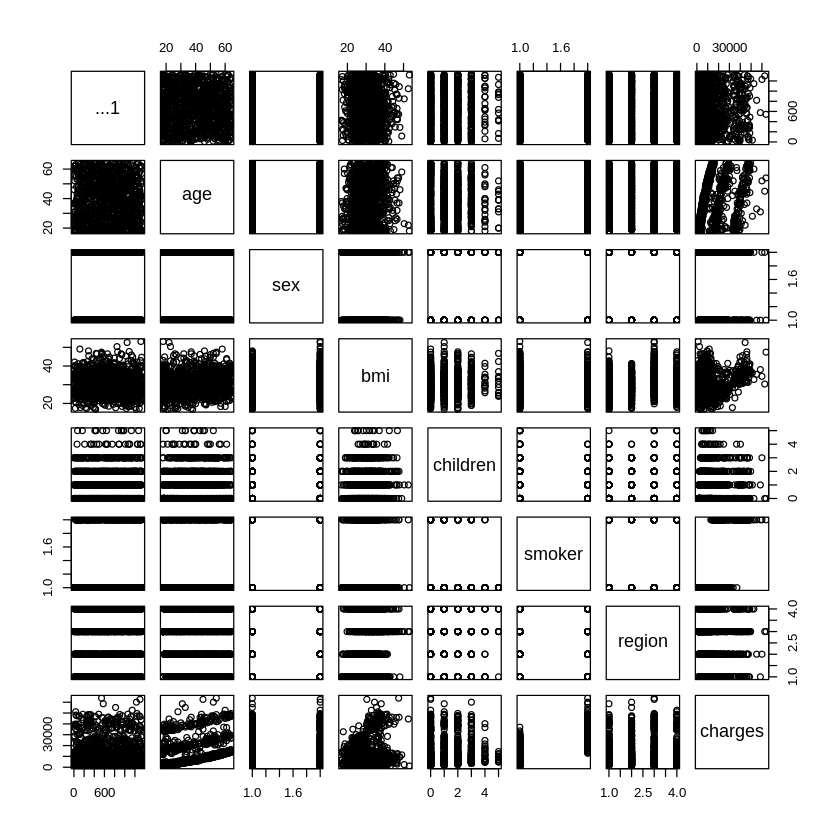

In [25]:
plot(df)

Warning message in geom_smooth(methpd = "lm"):
“Ignoring unknown parameters: `methpd`”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 105 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 105 rows containing missing values (`geom_point()`).”


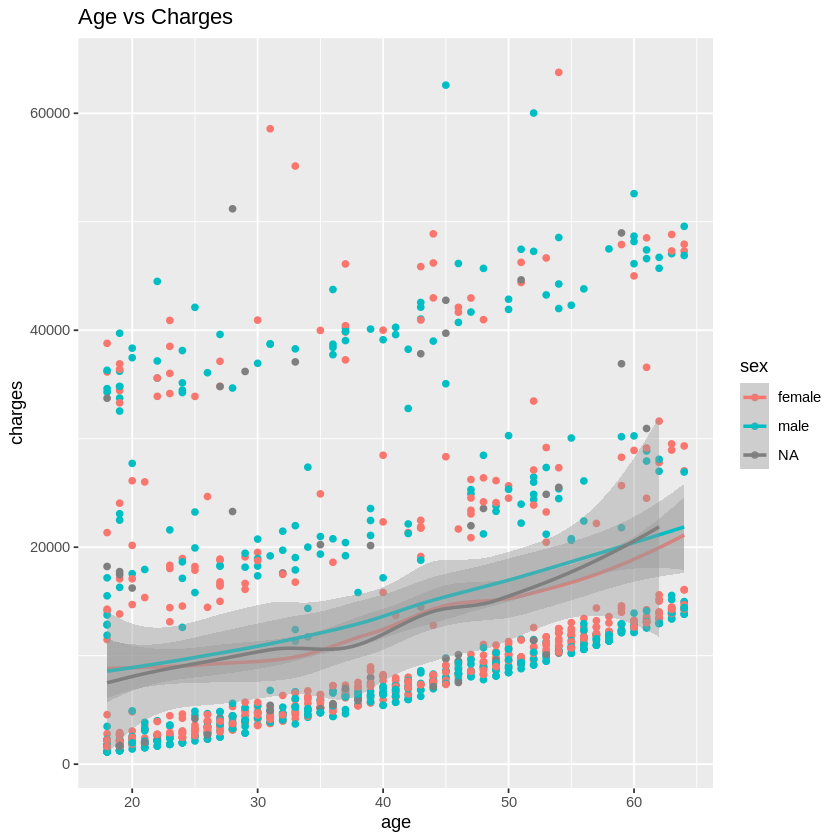

In [30]:
# Age vs charges
ggplot(df, aes(x = age, y = charges, color = sex)) +
  geom_point() +
    geom_smooth(methpd= 'lm') +
      labs(title = "Age vs Charges")


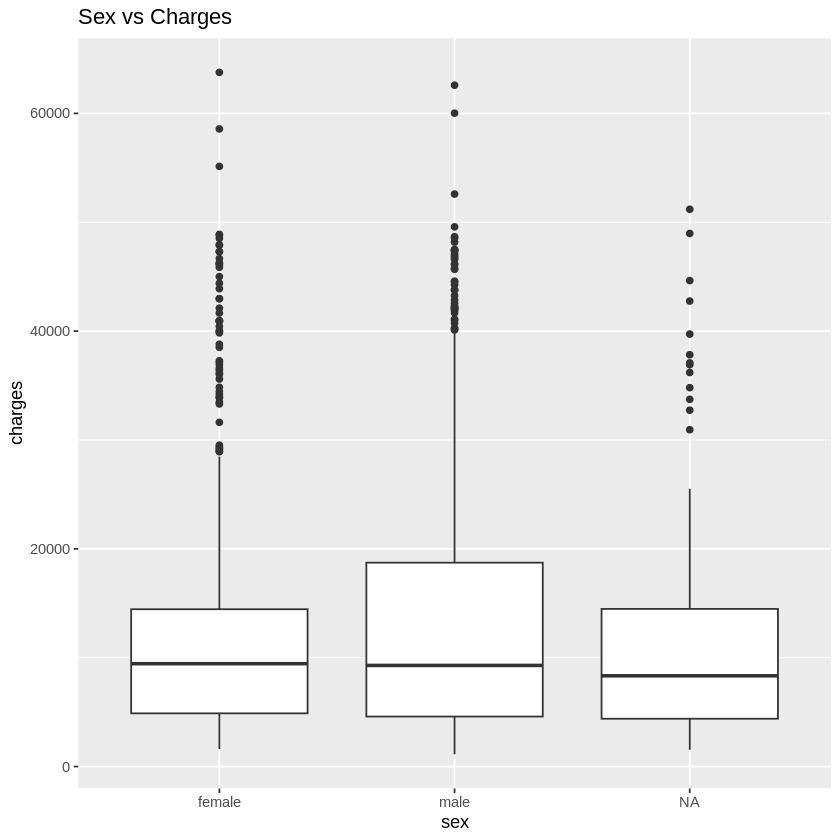

In [11]:
# Sex vs charges
ggplot(df, aes(x = sex, y = charges)) +
  geom_boxplot() +
  #geom_point() +
    labs(title = "Sex vs Charges")



Warning message:
“Removed 112 rows containing missing values (`geom_point()`).”


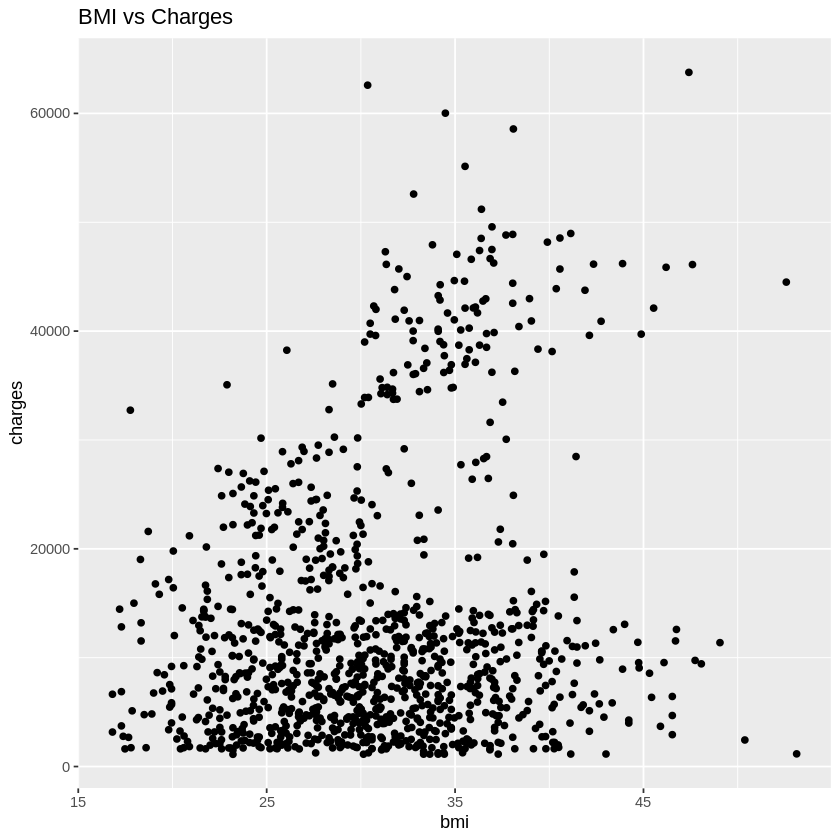

In [35]:
# BMI vs charges
ggplot(df, aes(x = bmi, y = charges)) +
  geom_point() +
    #geom_smooth() +
      labs(title = "BMI vs Charges")



Warning message:
“Removed 117 rows containing missing values (`geom_point()`).”


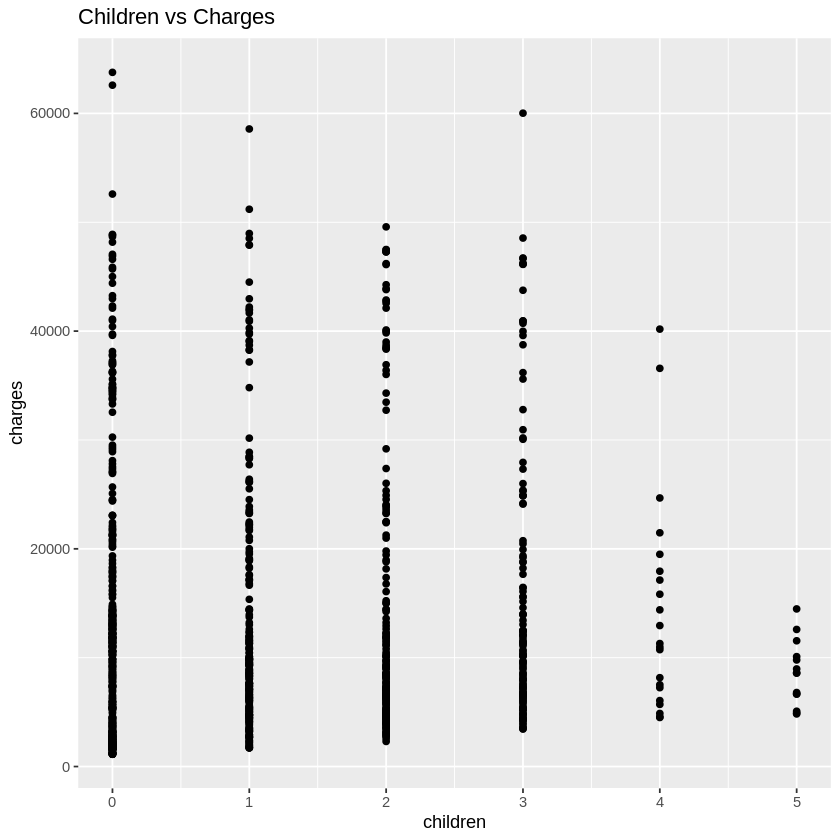

In [15]:
 #Children vs charges
ggplot(df, aes(x = children, y = charges)) +
  #geom_boxplot() +
  geom_point() +
    labs(title = "Children vs Charges")



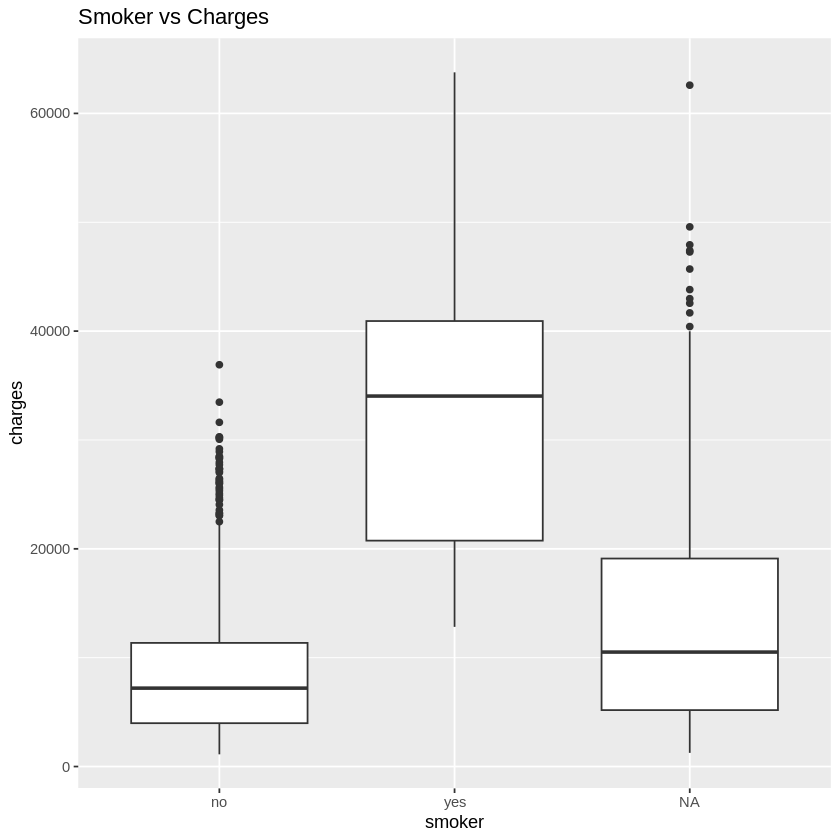

In [16]:
# Smoker vs charges
ggplot(df, aes(x = smoker, y = charges)) +
  geom_boxplot() +
    labs(title = "Smoker vs Charges")


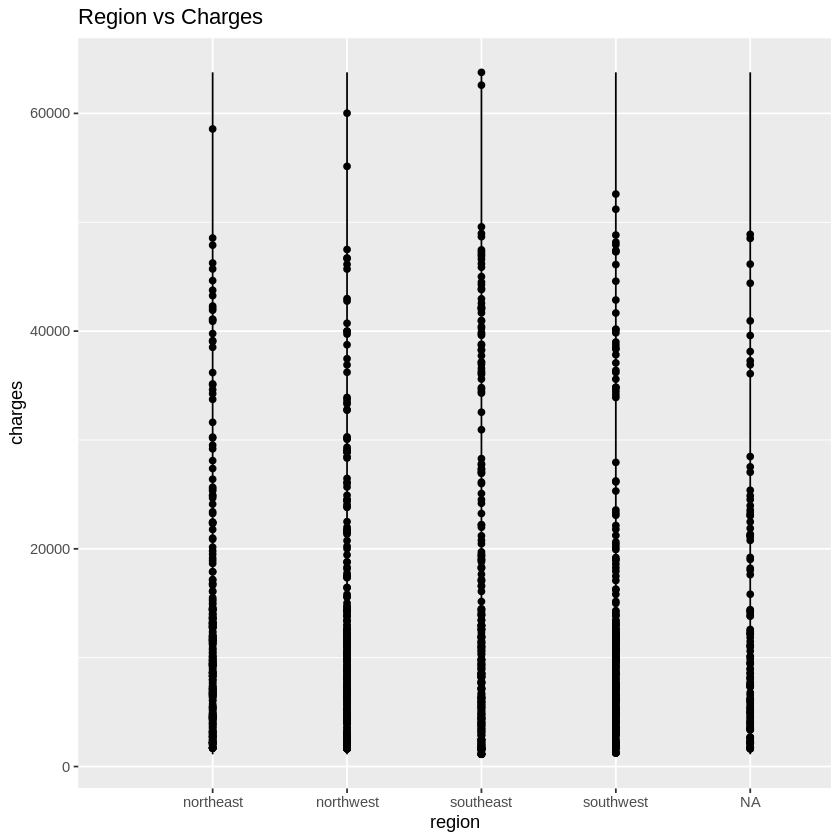

In [37]:

# Region vs charges
ggplot(df, aes(x = region, y = charges)) +
  #geom_boxplot() +
      geom_point() +
        geom_density()+

    labs(title = "Region vs Charges")

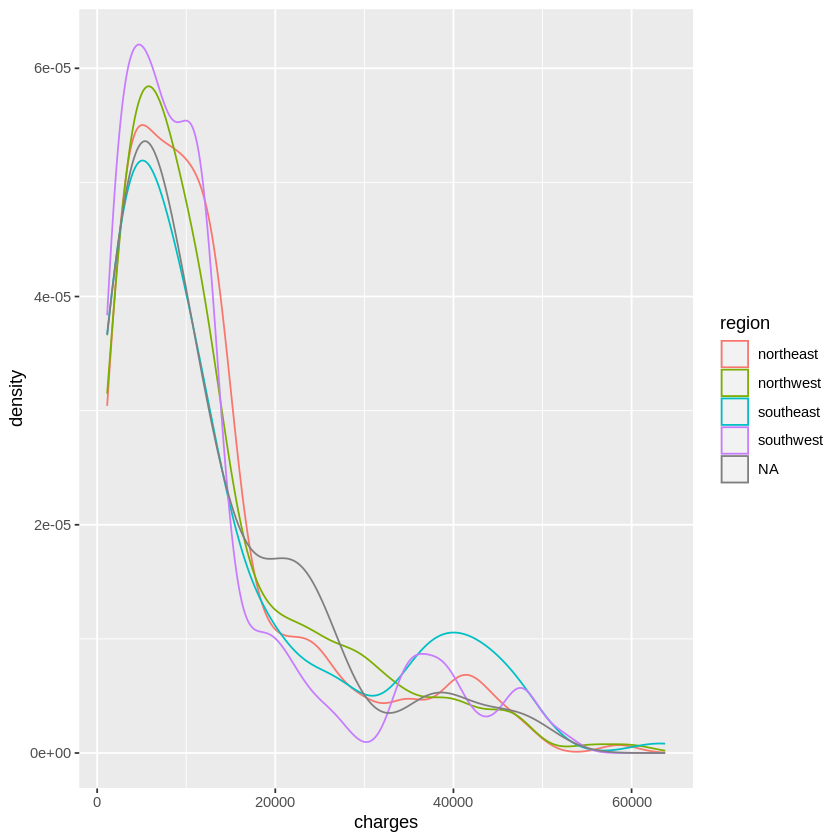

In [40]:
ggplot(df, aes(x = charges, color = region)) +
  geom_density()

In [41]:
mean(df$bmi, na.rm = TRUE)

[1] 30.74263

In [42]:
df %>%
  group_by(region) %>%
  summarise(mean(bmi, na.rm = TRUE))

region,"mean(bmi, na.rm = TRUE)"
<fct>,<dbl>
northeast,29.10958
northwest,29.45477
southeast,33.55677
southwest,30.78809
NA,30.53133


In [43]:
df %>%
  group_by(smoker) %>%
  summarise(mean(bmi, na.rm = TRUE))

smoker,"mean(bmi, na.rm = TRUE)"
<fct>,<dbl>
no,30.79021
yes,30.49174
NA,30.86468


In [44]:
df %>%
  group_by(sex) %>%
  summarise(mean(bmi, na.rm = TRUE))

sex,"mean(bmi, na.rm = TRUE)"
<fct>,<dbl>
female,30.56302
male,31.15036
NA,29.62471


In [23]:
install.packages('caret')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [38]:
df$sex <- as.factor(df$sex)
df$smoker <- as.factor(df$smoker)
df$region <- as.factor(df$region)

library(caret)

#set.seed(123)
trainIndex <- createDataPartition(df$charges, p = 0.8, list = FALSE)
trainSet <- df[trainIndex,]
testSet <- df[-trainIndex,]

In [39]:
model <- lm(charges ~ ., data = trainSet)

predictions <- predict(model, newdata = testSet)

MAE <- mean(abs(predictions - testSet$charges))  # Mean Absol
RMSE <- sqrt(mean((predictions - testSet$charges)^2))  # Root Mean Squared Error
R2 <- 1 - sum((predictions - testSet$charges)^2) / sum((mean(trainSet$charges) - testSet$charges)^2)  # R-squared

cat("MAE:", MAE, "\n")
cat("RMSE:", RMSE, "\n")
cat("R-squared:", R2, "\n")

MAE: NA 
RMSE: NA 
R-squared: NA 


#### Data set from class

Read in and subset data to `Indicator.Code == "SP.ADO.TFRT"`.

In [45]:
hwdata <- read_csv('Gender_StatsData.csv')

New names:
• `` -> `...1`
Rows: 7101 Columns: 64
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country.Name, Country.Code, Indicator.Name, Indicator.Code
dbl (59): ...1, X1960, X1961, X1962, X1963, X1964, X1965, X1966, X1967, X196...
lgl  (1): X

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [46]:
adf <- hwdata %>%
          filter(Indicator.Code == "SP.ADO.TFRT")

In [47]:
head(adf)

...1,Country.Name,Country.Code,Indicator.Name,Indicator.Code,X1960,X1961,X1962,X1963,X1964,⋯,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,134.22361,134.83863,135.57090,135.44464,135.27490,⋯,50.10461,49.90012,49.72376,49.53907,49.11124,48.64754,48.11455,47.44007,NA,NA
28,Caribbean small states,CSS,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,146.74378,146.90023,147.06916,145.61994,144.30854,⋯,61.54816,60.28361,58.97198,57.57641,56.43608,55.25676,54.05761,52.80647,NA,NA
55,Central Europe and the Baltics,CEB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,46.09934,45.42201,44.70266,44.96390,45.19137,⋯,21.61264,21.24941,20.94254,20.69047,20.38378,20.09069,19.78258,19.45588,NA,NA
82,Early-demographic dividend,EAR,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,116.39722,116.71277,117.03263,117.17572,117.23766,⋯,49.52492,48.10408,46.67493,45.22856,44.20325,43.16256,42.10963,41.03055,NA,NA
109,East Asia & Pacific,EAS,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,65.92060,65.00147,64.12404,62.13225,60.23970,⋯,19.20314,19.77529,20.30219,20.76049,20.88883,20.98108,21.05460,21.05791,NA,NA
136,East Asia & Pacific (excluding high income),EAP,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,75.21195,74.54178,73.72291,71.40985,69.06117,⋯,20.31471,21.00435,21.64549,22.20800,22.39288,22.52617,22.62485,22.63447,NA,NA


### Probability Integrals

- Binomial Distribution
- Normal Distribution



- Flip 4 coins -- outcomes?

In [51]:
fx <- function(x) {
 -x^2+1
}


In [52]:
fx(3)

[1] -8

In [54]:
integrate(fx, lower=-1, upper= 1)

1.333333 with absolute error < 1.5e-14

### Regression Models in R

In [55]:
smokers <- df %>%
  filter(smoker == 'yes')
head(smokers)

...1,age,sex,bmi,children,smoker,region,charges
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
29,31,male,36.30,2,yes,southwest,38711.00
34,28,NA,36.40,1,yes,southwest,51194.56
38,NA,male,36.67,NA,yes,northeast,39774.28
39,60,male,39.90,0,yes,southwest,48173.36
49,36,male,35.20,1,yes,southeast,38709.18
52,48,NA,28.00,1,yes,southwest,23568.27


In [56]:
model <- lm(charges ~ age, data = smokers)

In [57]:
model


Call:
lm(formula = charges ~ age, data = smokers)

Coefficients:
(Intercept)          age  
    20477.5        296.7  


In [58]:
summary(model)


Call:
lm(formula = charges ~ age, data = smokers)

Residuals:
   Min     1Q Median     3Q    Max 
-15931 -10781   5815   8570  28896 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20477.51    2158.05   9.489  < 2e-16 ***
age           296.69      52.76   5.623 6.22e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10780 on 201 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.1359,	Adjusted R-squared:  0.1316 
F-statistic: 31.62 on 1 and 201 DF,  p-value: 6.217e-08


In [59]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,3675549565,3675549565,31.62035,6.216895e-08
Residuals,201,23364243071,116240015,NA,NA


In [60]:
methods('summary')

  [1] summary,ANY-method                  summary,DBIObject-method           
  [3] summary,diagonalMatrix-method       summary,mle-method                 
  [5] summary,sparseMatrix-method         summary.aareg*                     
  [7] summary.aov*                        summary.aovlist*                   
  [9] summary.aspell*                     summary.bag*                       
 [11] summary.bagEarth                    summary.bagFDA*                    
 [13] summary.bit*                        summary.bitwhich*                  
 [15] summary.booltype*                   summary.cch*                       
 [17] summary.check_packages_in_dir*      summary.classbagg*                 
 [19] summary.col_spec*                   summary.connection*                
 [21] summary.corAR1*                     summary.corARMA*                   
 [23] summary.corCAR1*                    summary.corCompSymm*               
 [25] summary.corExp*                     summary.corGaus*      

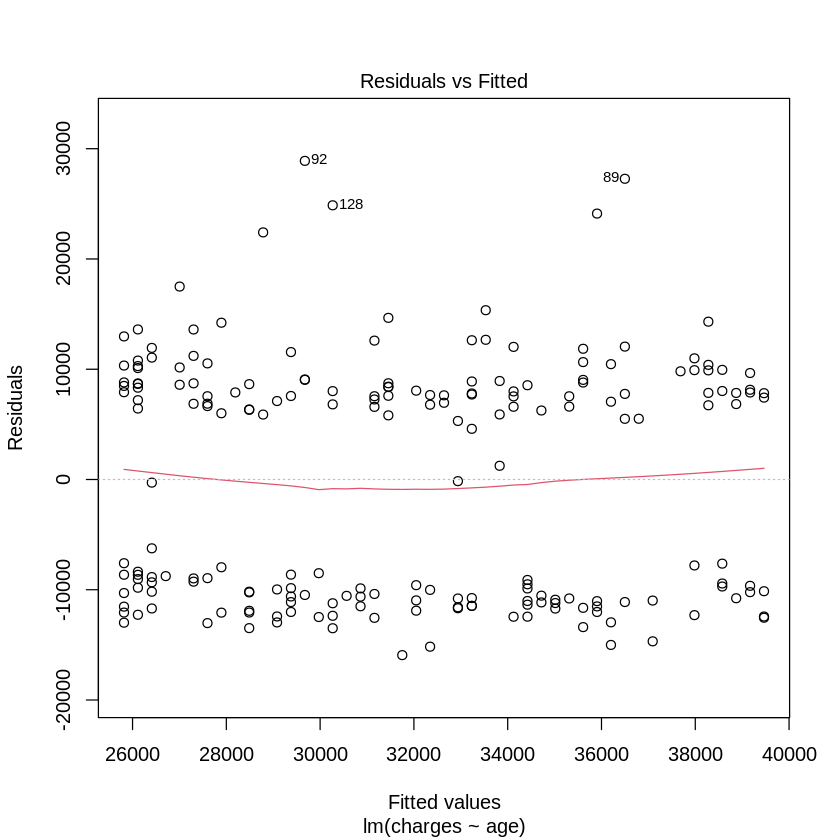

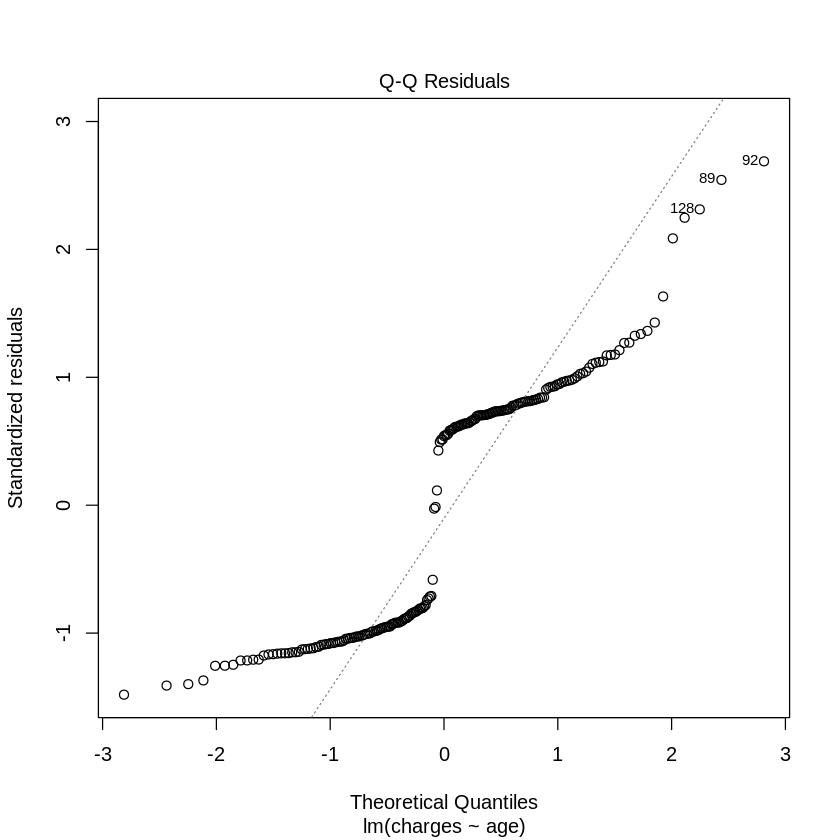

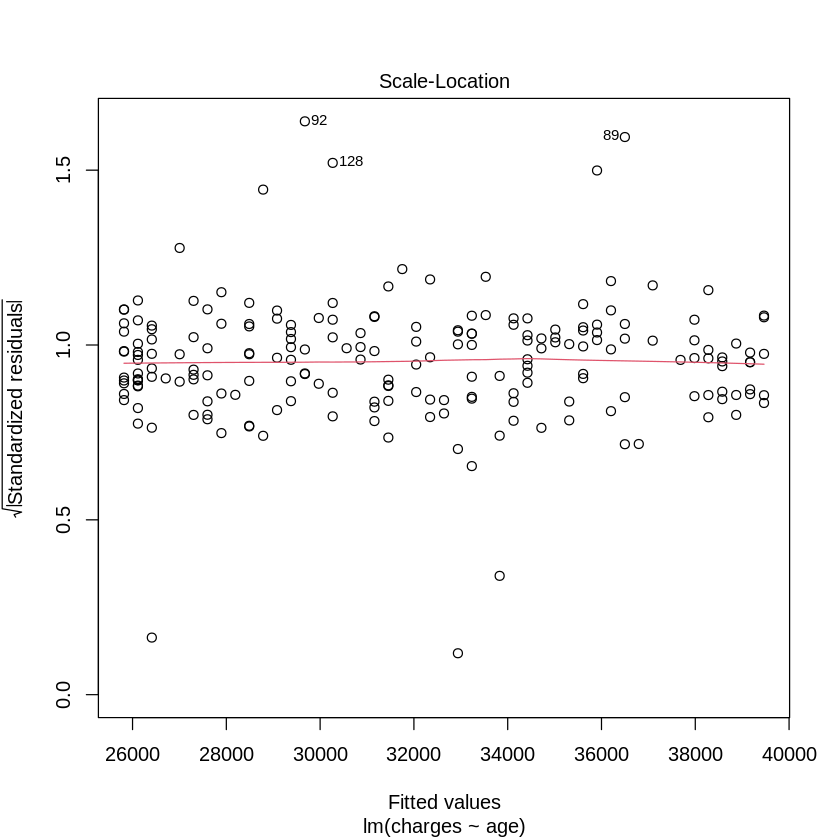

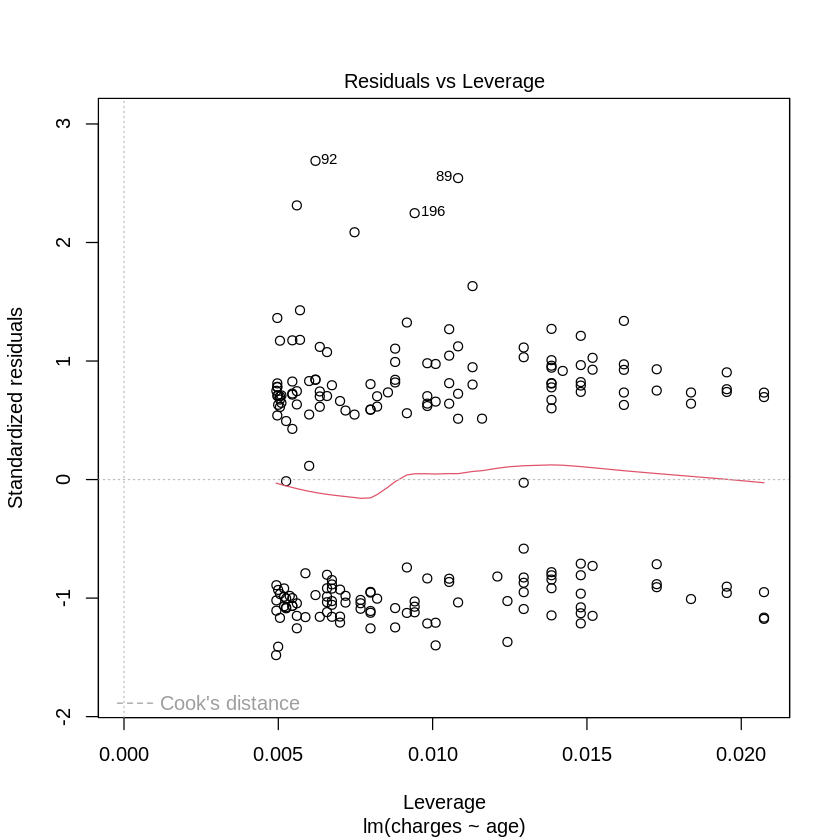

In [61]:
plot(model)

In [63]:
model2 <- lm(charges ~ age+bmi, data = smokers)

In [64]:
model2


Call:
lm(formula = charges ~ age + bmi, data = smokers)

Coefficients:
(Intercept)          age          bmi  
   -23984.5        263.5       1483.6  


In [65]:
summary(model2)


Call:
lm(formula = charges ~ age + bmi, data = smokers)

Residuals:
     Min       1Q   Median       3Q      Max 
-15318.7  -4371.6    164.4   3547.3  19143.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23984.50    2305.21 -10.404  < 2e-16 ***
age            263.46      29.75   8.856  7.8e-16 ***
bmi           1483.61      66.69  22.248  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5630 on 180 degrees of freedom
  (35 observations deleted due to missingness)
Multiple R-squared:  0.7695,	Adjusted R-squared:  0.767 
F-statistic: 300.5 on 2 and 180 DF,  p-value: < 2.2e-16


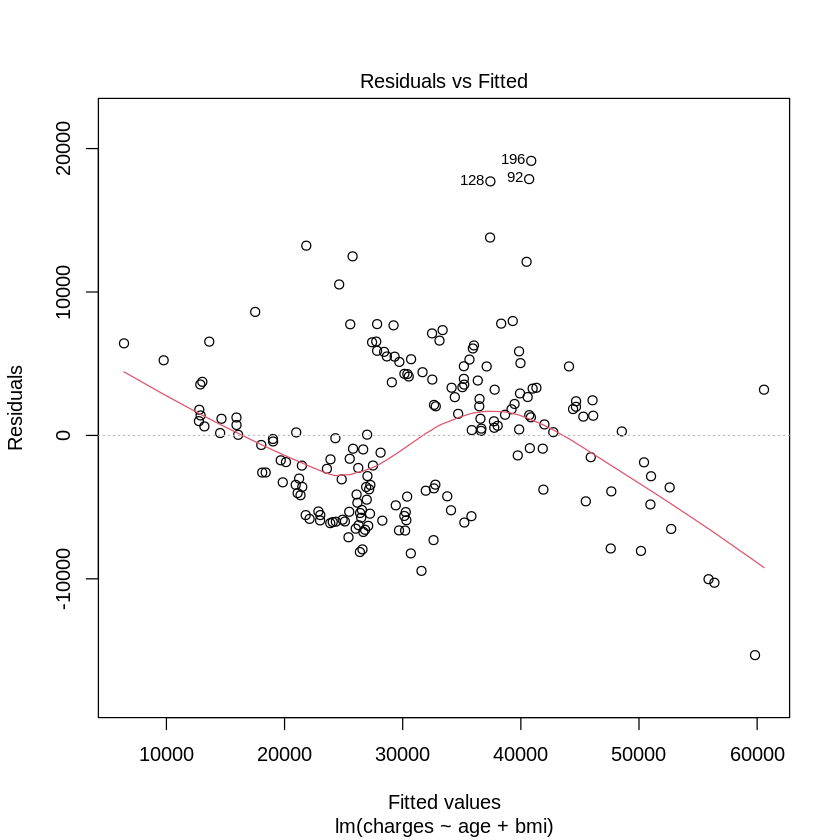

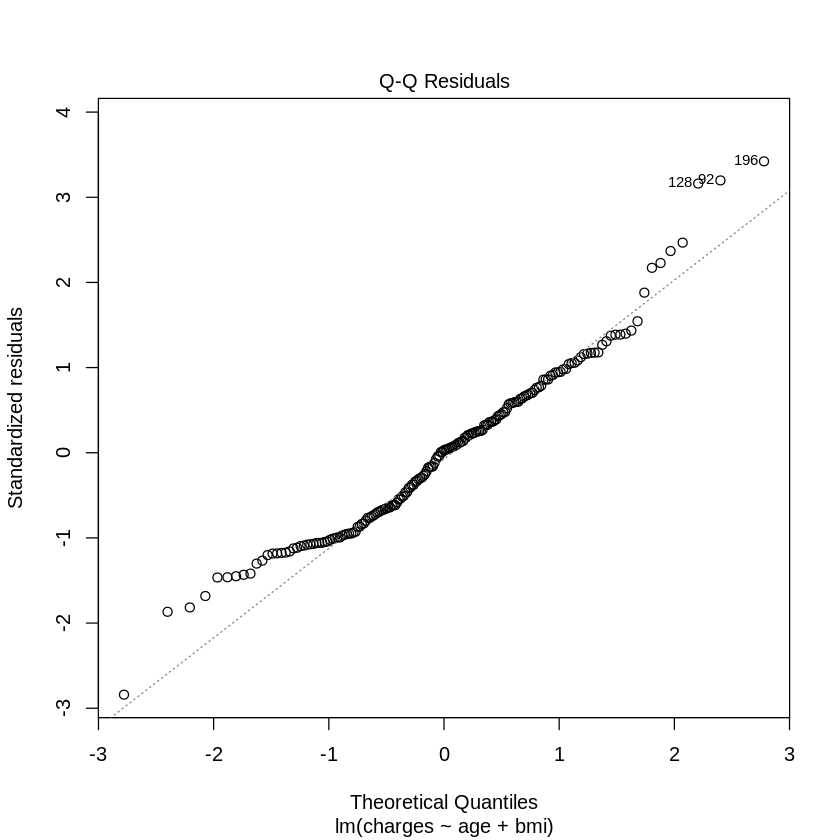

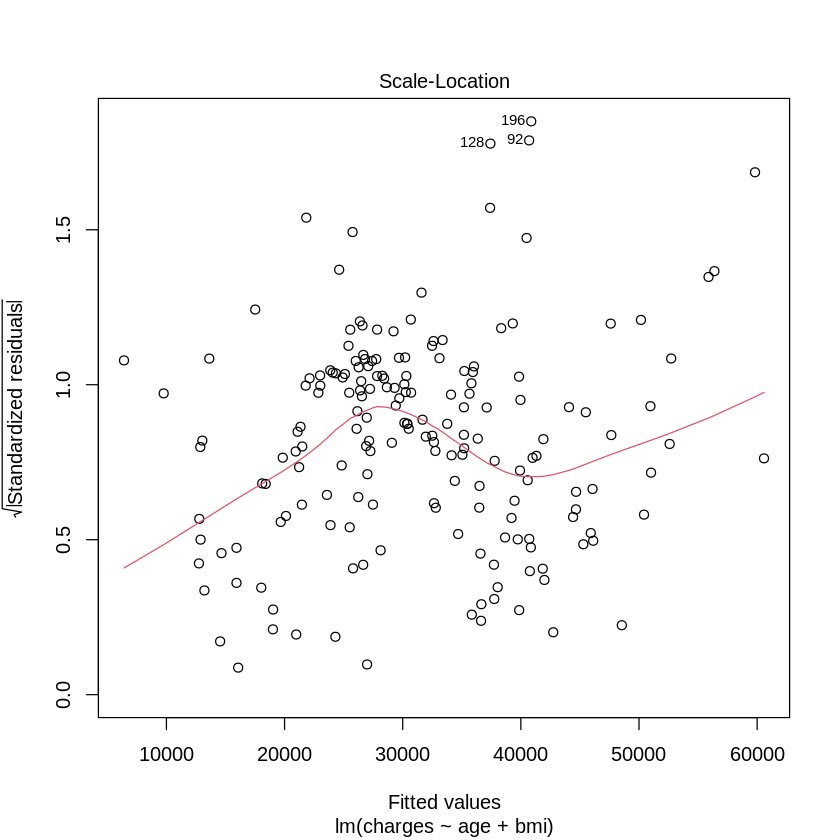

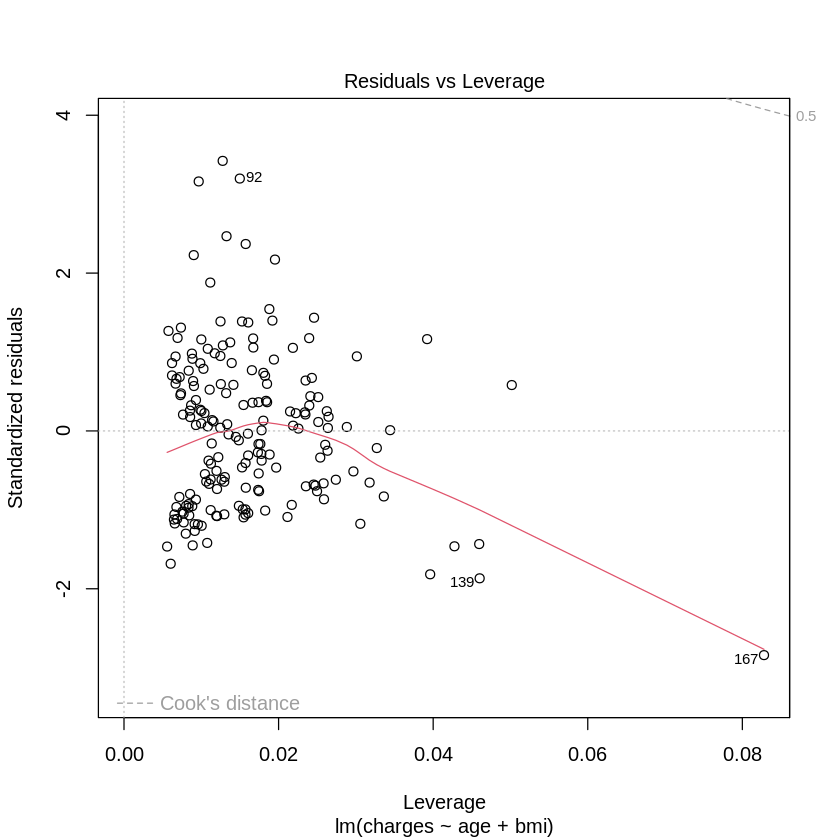

In [66]:
plot(model2)

In [67]:
model3 <- lm(charges ~ age + bmi + region , data = smokers)

In [68]:
model3


Call:
lm(formula = charges ~ age + bmi + region, data = smokers)

Coefficients:
    (Intercept)              age              bmi  regionnorthwest  
       -23129.5            266.8           1481.1          -1126.5  
regionsoutheast  regionsouthwest  
        -1249.4           -690.3  
